In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 文件路径
main_results_file = "main_results.csv"
glove_results_file = "glove_results.csv"
ablation_results_file = "ablation_results.csv"
ablation_glove_results_file = "ablation_glove_results.csv"

# 读取数据
main_results = pd.read_csv(main_results_file).copy()
glove_results = pd.read_csv(glove_results_file).copy()
ablation_results = pd.read_csv(ablation_results_file).copy()
ablation_glove_results = pd.read_csv(ablation_glove_results_file).copy()

# 数据处理
ablation_results['Fusion Method'] = ablation_results['Fusion Method'].str.strip("[]").str.replace("'", "").str.replace(",", "+")
ablation_glove_results['Fusion Method'] = ablation_glove_results['Fusion Method'].str.strip("[]").str.replace("'", "").str.replace(",", "+")

# 提取 GatedMultiTransformer 的结果
gated_bert = ablation_results.iloc[-1].copy()
gated_glove = ablation_glove_results.iloc[-1].copy()

gated_bert['Fusion Method'] = 'GatedMultiTransformer'
gated_glove['Fusion Method'] = 'GatedMultiTransformer'

# 添加 GatedMultiTransformer 的完整结果到主结果表
main_results = pd.concat([main_results, pd.DataFrame([gated_bert], columns=main_results.columns)], ignore_index=True)
glove_results = pd.concat([glove_results, pd.DataFrame([gated_glove], columns=glove_results.columns)], ignore_index=True)


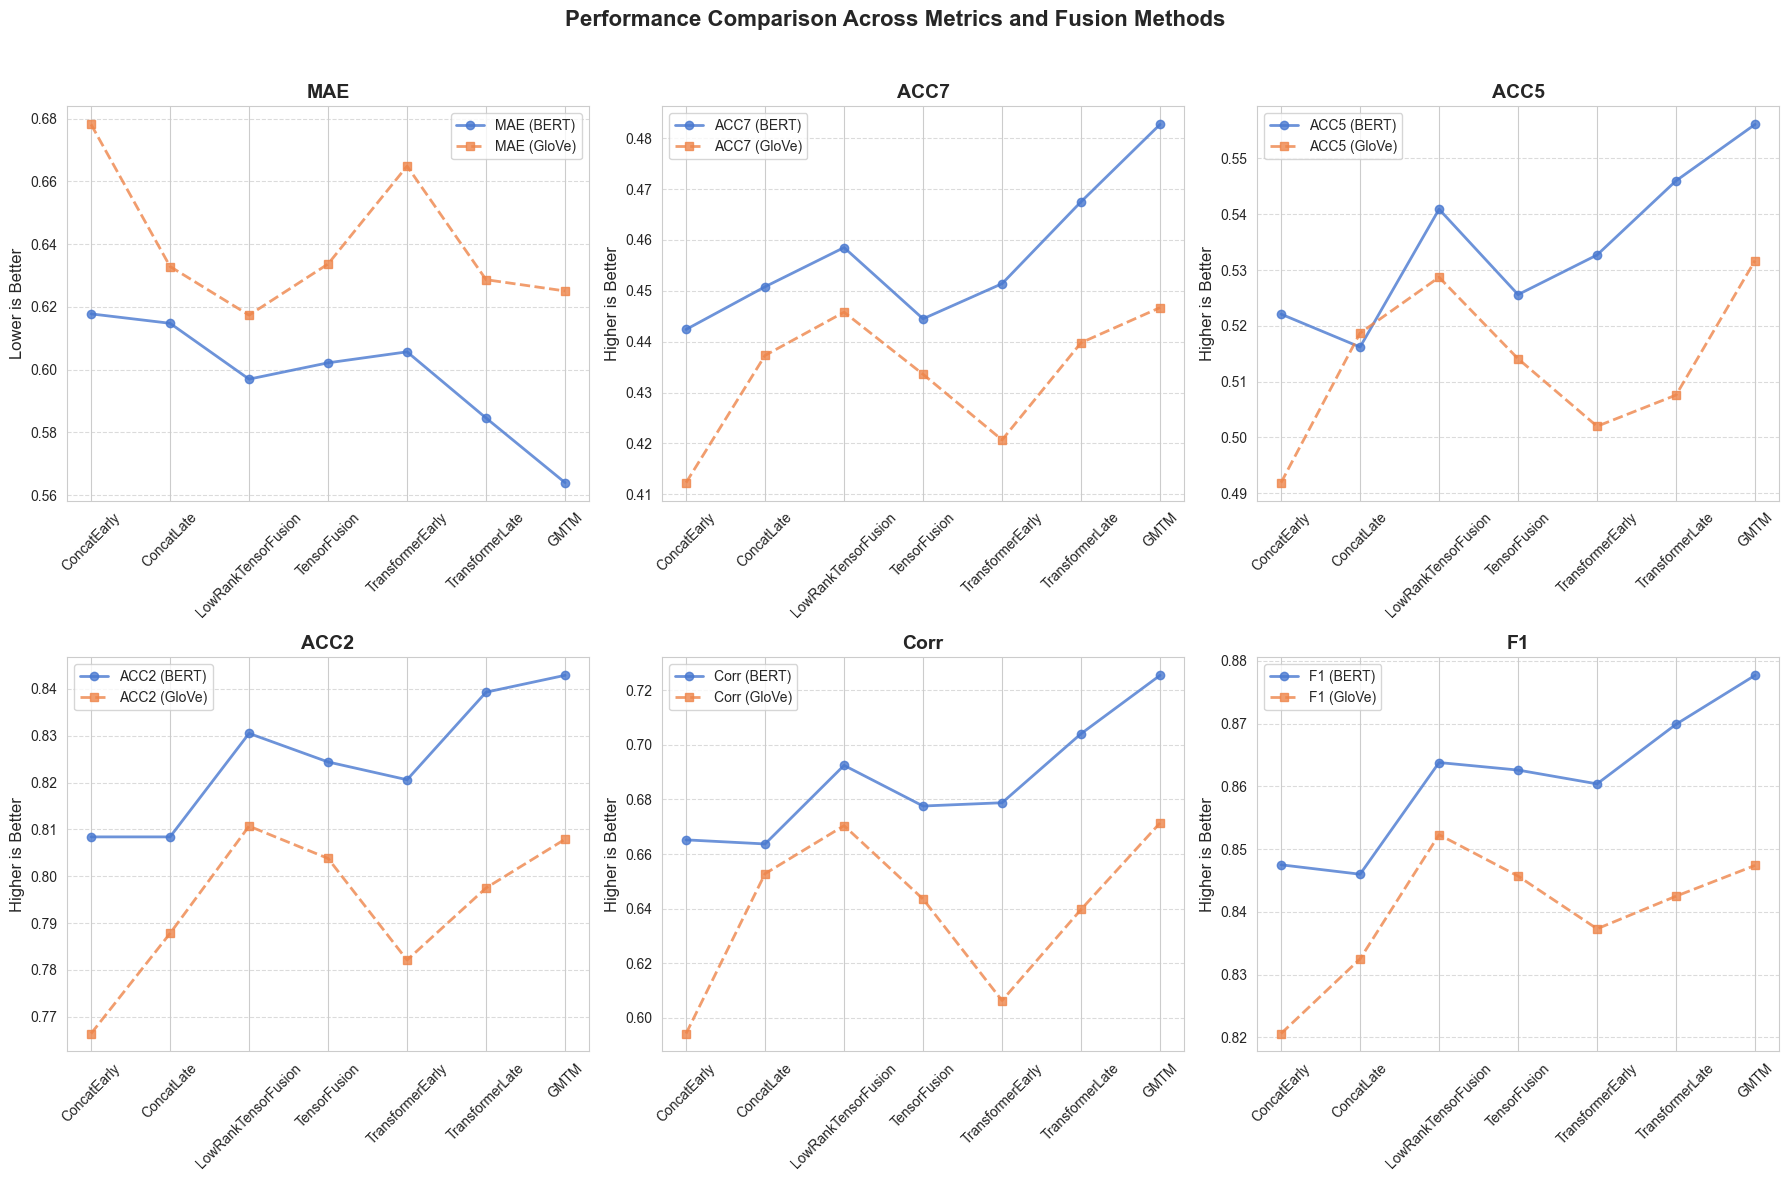

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

metrics = ["MAE", "ACC7", "ACC5", "ACC2", "Corr", "F1"]
methods = ["ConcatEarly", "ConcatLate", "LowRankTensorFusion", "TensorFusion", "TransformerEarly", "TransformerLate", "GMTM"]
# Seaborn settings
sns.set_palette("muted")
sns.set_style("whitegrid")


x = np.arange(len(methods))

# Plotting line plots: 3x2 layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Performance Comparison Across Metrics and Fusion Methods", fontsize=16, weight="bold")

for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]
    ax.plot(x, main_results[metric], label=f"{metric} (BERT)", marker="o", linestyle="-", color=sns.color_palette("muted")[0], linewidth=2, alpha=0.8)
    ax.plot(x, glove_results[metric], label=f"{metric} (GloVe)", marker="s", linestyle="--", color=sns.color_palette("muted")[1], linewidth=2, alpha=0.8)
    ax.set_title(metric, fontsize=14, weight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=45, fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend(fontsize=10)
    if metric in ["MAE"]:
        ax.set_ylabel("Lower is Better", fontsize=12)
    else:
        ax.set_ylabel("Higher is Better", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])



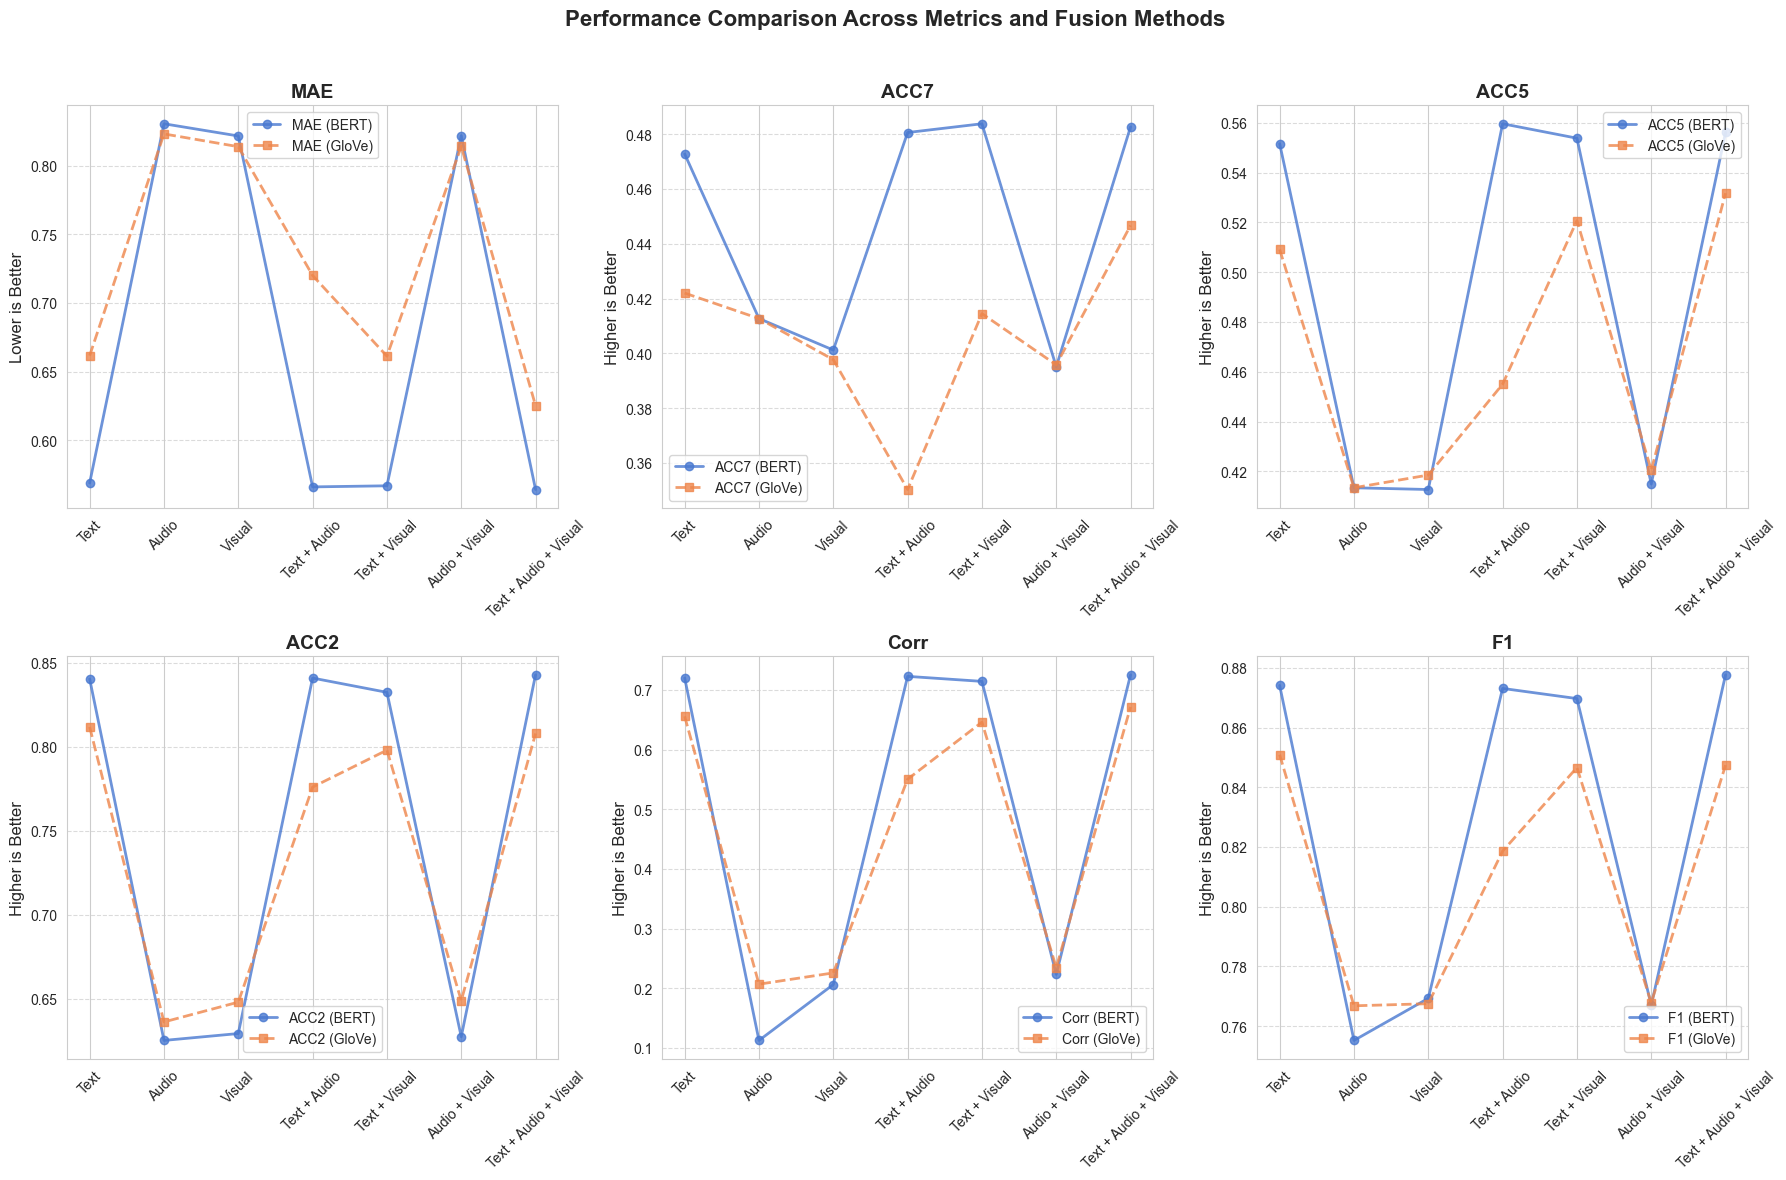

In [23]:
modalities = ["Text", "Audio", "Visual", "Text + Audio", "Text + Visual", "Audio + Visual", "Text + Audio + Visual"]

# Seaborn settings
sns.set_palette("muted")
sns.set_style("whitegrid")


x = np.arange(len(modalities))

# Plotting line plots: 3x2 layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Performance Comparison Across Metrics and Fusion Methods", fontsize=16, weight="bold")

for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]
    ax.plot(x, ablation_results[metric], label=f"{metric} (BERT)", marker="o", linestyle="-", color=sns.color_palette("muted")[0], linewidth=2, alpha=0.8)
    ax.plot(x, ablation_glove_results[metric], label=f"{metric} (GloVe)", marker="s", linestyle="--", color=sns.color_palette("muted")[1], linewidth=2, alpha=0.8)
    ax.set_title(metric, fontsize=14, weight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(modalities, rotation=45, fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend(fontsize=10)
    if metric in ["MAE"]:
        ax.set_ylabel("Lower is Better", fontsize=12)
    else:
        ax.set_ylabel("Higher is Better", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])


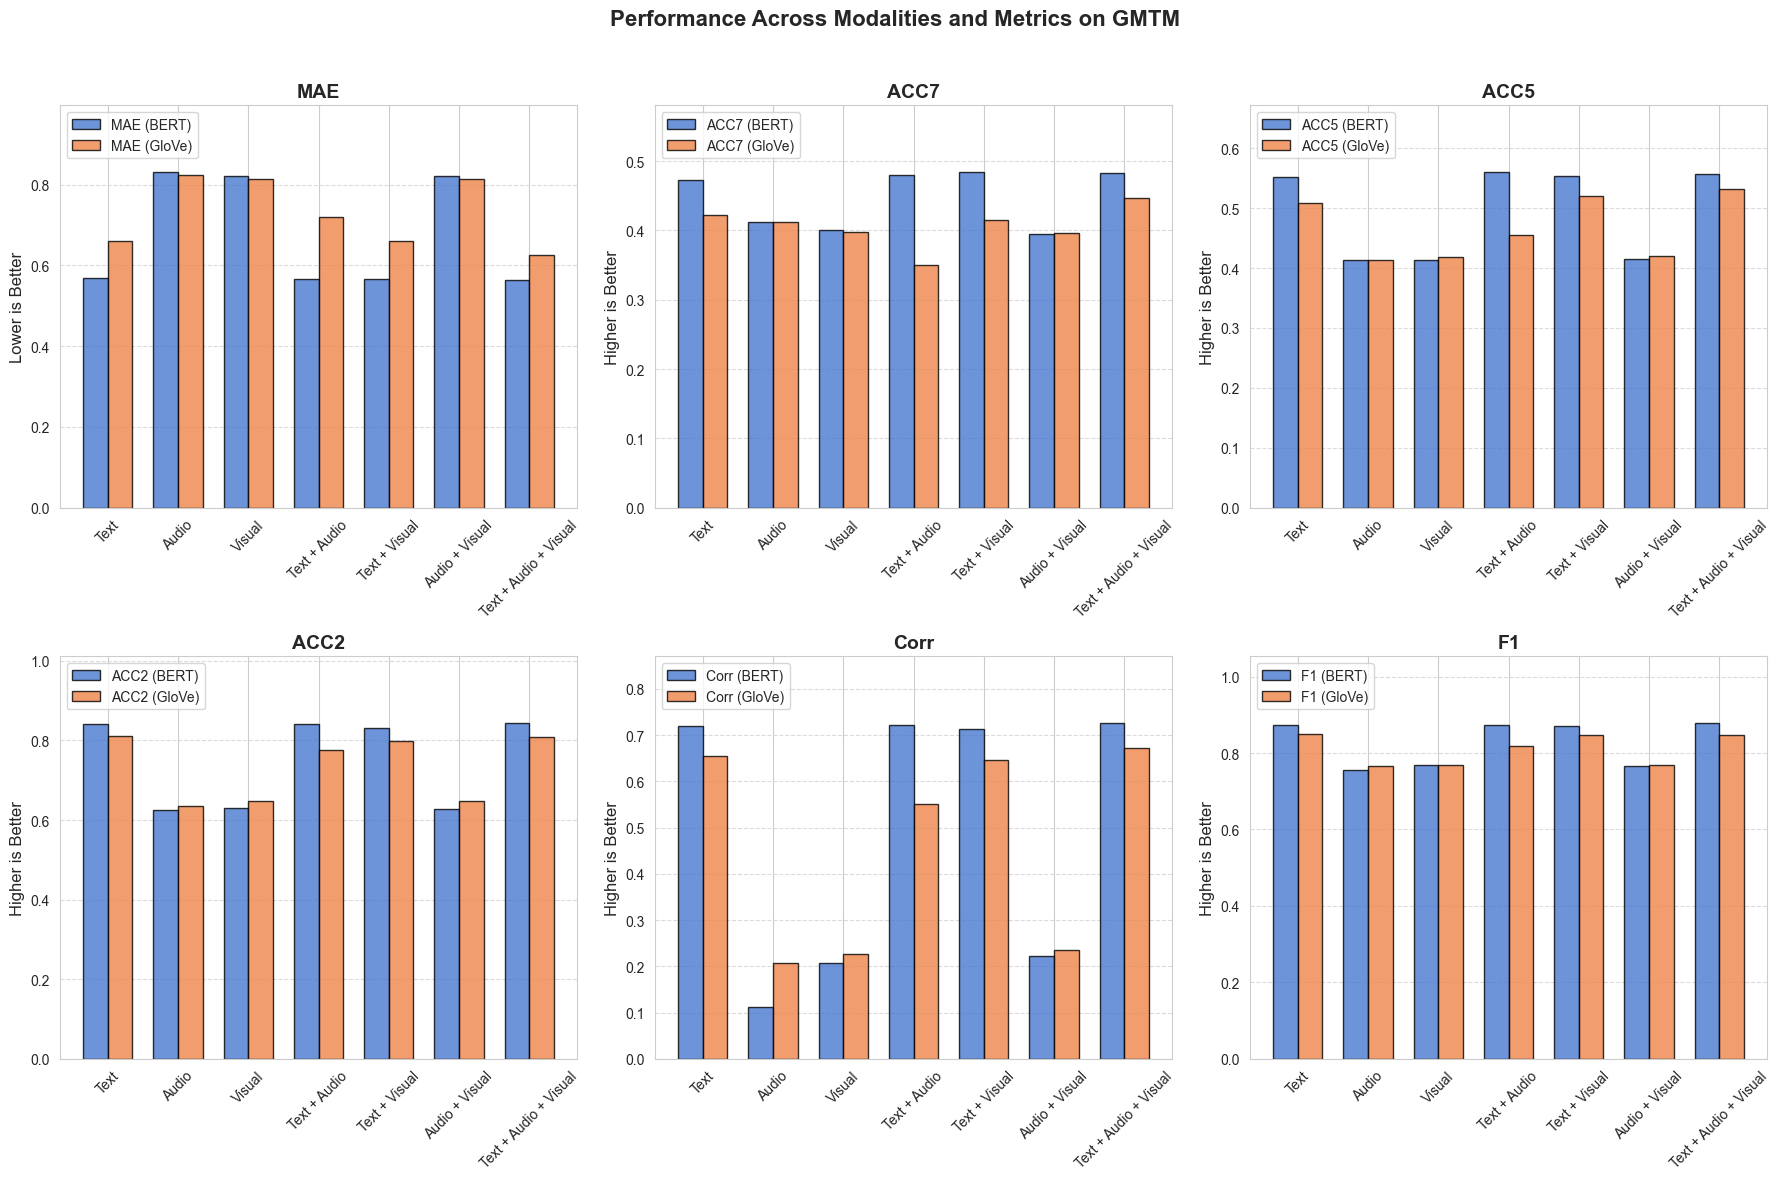

In [32]:
# Converting the line plot code to a bar chart
x = np.arange(len(modalities))
bar_width = 0.35

# Plotting bar charts: 3x2 layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Performance Across Modalities and Metrics on GMTM", fontsize=16, weight="bold")

for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]
    ax.bar(
        x - bar_width / 2,
        ablation_results[metric],
        width=bar_width,
        label=f"{metric} (BERT)",
        color=sns.color_palette("muted")[0],
        alpha=0.8,
        edgecolor="black",
    )
    ax.bar(
        x + bar_width / 2,
        ablation_glove_results[metric],
        width=bar_width,
        label=f"{metric} (GloVe)",
        color=sns.color_palette("muted")[1],
        alpha=0.8,
        edgecolor="black",
    )
    ax.set_title(metric, fontsize=14, weight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(modalities, rotation=45, fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend(fontsize=10, loc="upper left")
    if metric in ["MAE"]:
        ax.set_ylabel("Lower is Better", fontsize=12)
        ax.set_ylim(0, max(ablation_results[metric].max(), ablation_glove_results[metric].max()) * 1.2)
    else:
        ax.set_ylabel("Higher is Better", fontsize=12)
        ax.set_ylim(0, max(ablation_results[metric].max(), ablation_glove_results[metric].max()) * 1.2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()